## **Telecom Customer Churn Analysis**


### **Table of Contents**
1. Introduction
2. Import Libraries
3. Load and Explore Data
4. Data Cleaning
5. Exploratory Data Analysis (Graphs)
6. Key insights
8. Conclusion

## **1. Introduction**
This project focuses on analyzing telecom customer data to understand the behavior of customers and identify the major factors that contribute to chur


**Project Objectives**

The main objective of this project is to perform exploratory data analysis and find useful insights from the the dataset.


**Dataset Description**

The dataset cntains information about customer demographics, services subscribed, account information, and  churn status.

In [ ]:
# Settings
import warnings
warnings.filterwarnings('ignore')
# Data manipulation and analysis
import pandas as pd
import numpy as np

# **Load and Explore Data**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Telecom_customer_churn.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Number of Customers: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")

Dataset Shape: (7043, 21)
Number of Customers: 7,043
Number of Features: 21


In [ ]:
# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Total Missing Values: 0


# **Data Cleaning**

In [ ]:
# Create a copy for cleaning
df_clean = df.copy()

# Convert TotalCharges to numeric (it may contain spaces or non-numeric values)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check for any null values created
print(f"Null values in TotalCharges after conversion: {df_clean['TotalCharges'].isnull().sum()}")

# Handle null values if any
if df_clean['TotalCharges'].isnull().sum() > 0:
    # Fill with median or drop rows
    df_clean = df_clean.dropna(subset=['TotalCharges'])
    print(f"Rows after cleaning: {df_clean.shape[0]}")

Null values in TotalCharges after conversion: 11
Rows after cleaning: 7032


In [ ]:
# Remove customerID as it's not useful for modeling
df_clean = df_clean.drop('customerID', axis=1)

print("✓ Data cleaning completed")
print(f"Final dataset shape: {df_clean.shape}")

✓ Data cleaning completed
Final dataset shape: (7032, 20)


## **5. Exploratory Data Analysis**

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

**5.1 Churn Distribution**

Churn Distribution:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


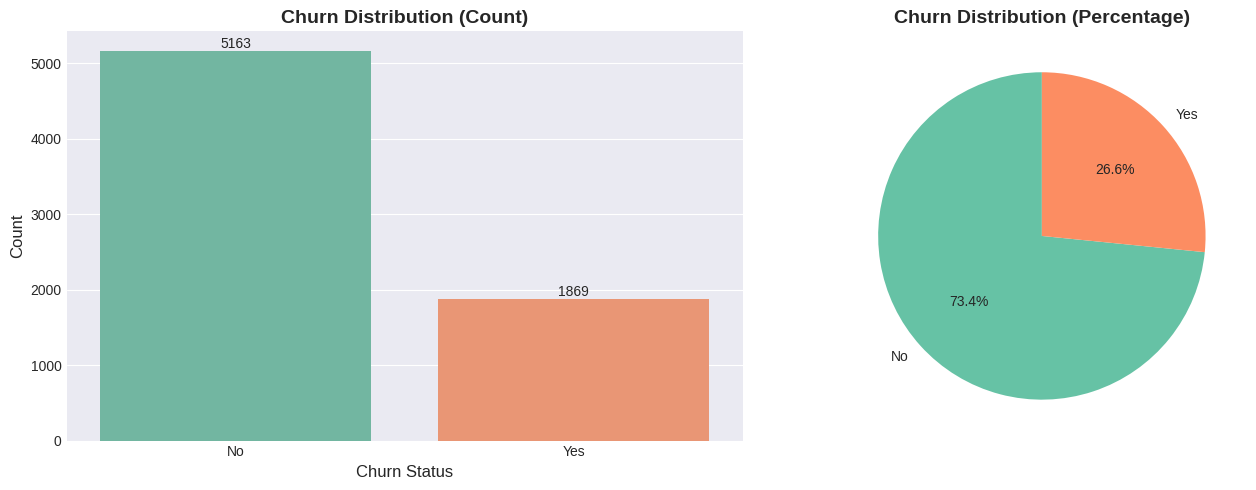

In [ ]:
# Churn distribution
churn_counts = df_clean['Churn'].value_counts()
churn_pct = df_clean['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(churn_counts)
print("\nPercentage:")
print(churn_pct)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df_clean, x='Churn', ax=axes[0], palette='Set2')
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**5.2 Demographic Analysis**

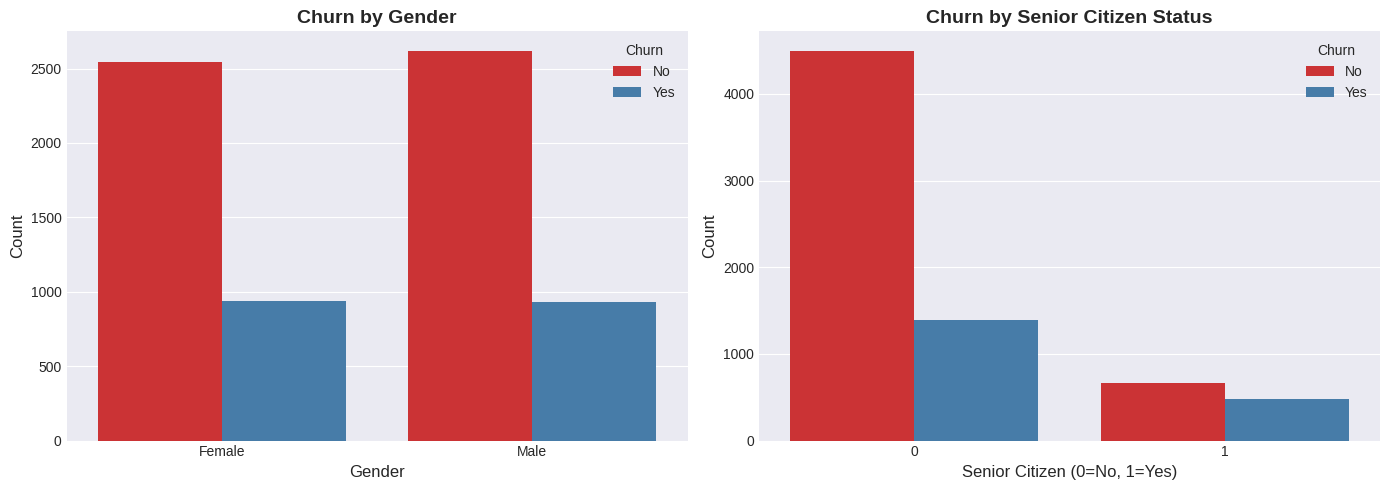

In [ ]:
# Gender vs Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df_clean, x='gender', hue='Churn', ax=axes[0], palette='Set1')
axes[0].set_title('Churn by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Churn')

# Senior Citizen vs Churn
sns.countplot(data=df_clean, x='SeniorCitizen', hue='Churn', ax=axes[1], palette='Set1')
axes[1].set_title('Churn by Senior Citizen Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Senior Citizen (0=No, 1=Yes)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Churn')

plt.tight_layout()
plt.show()

**5.3 Contract and Service Analysis**

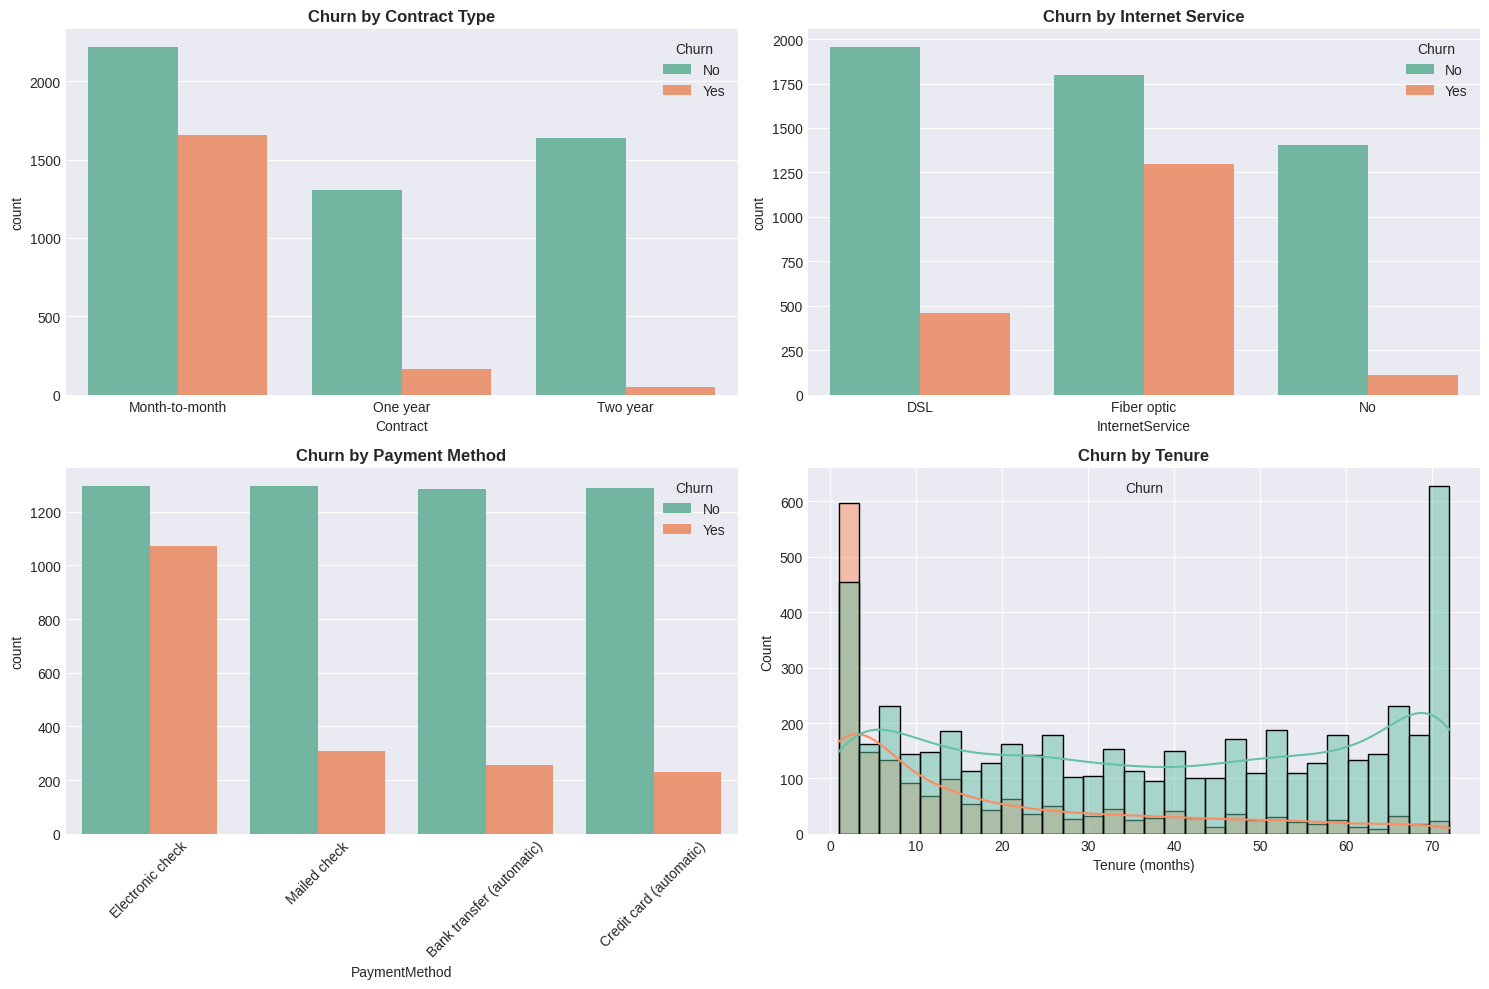

In [ ]:
# Contract type vs Churn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Contract
sns.countplot(data=df_clean, x='Contract', hue='Churn', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Churn by Contract Type', fontsize=12, fontweight='bold')
axes[0, 0].legend(title='Churn')

# Internet Service
sns.countplot(data=df_clean, x='InternetService', hue='Churn', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Churn by Internet Service', fontsize=12, fontweight='bold')
axes[0, 1].legend(title='Churn')

# Payment Method
sns.countplot(data=df_clean, x='PaymentMethod', hue='Churn', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Churn by Payment Method', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Churn')

# Tenure
sns.histplot(data=df_clean, x='tenure', hue='Churn', bins=30, ax=axes[1, 1], palette='Set2', kde=True)
axes[1, 1].set_title('Churn by Tenure', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tenure (months)')
axes[1, 1].legend(title='Churn')

plt.tight_layout()
plt.show()

**5.4 Numerical Features Analysis**

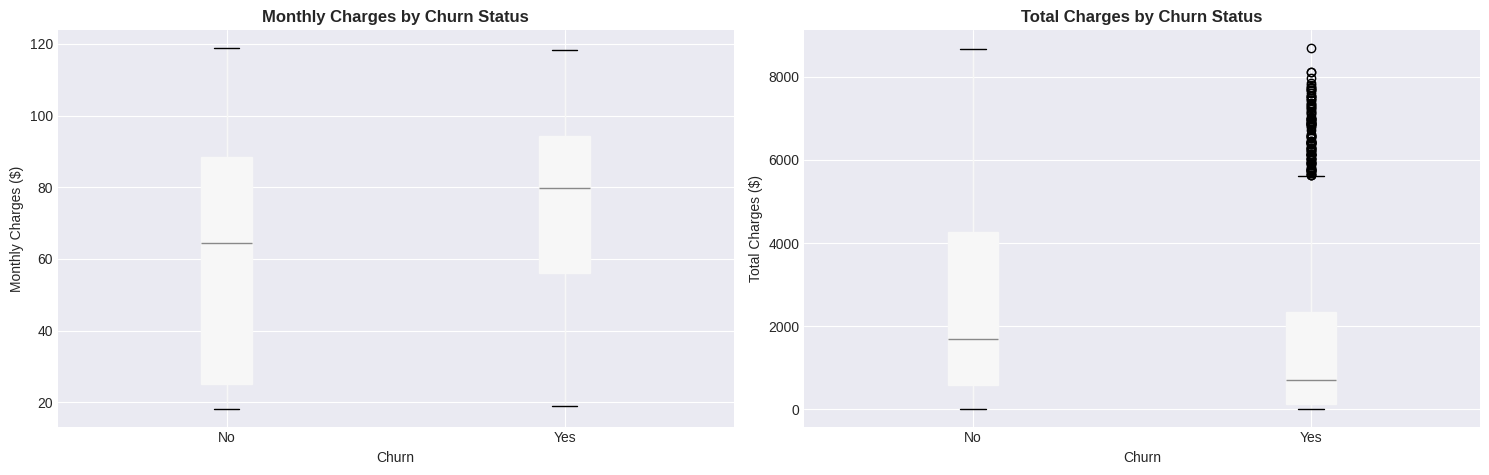

In [ ]:
# Monthly and Total Charges analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Monthly Charges
df_clean.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0], patch_artist=True)
axes[0].set_title('Monthly Charges by Churn Status', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Monthly Charges ($)')
plt.sca(axes[0])
plt.xticks([1, 2], ['No', 'Yes'])

# Total Charges
df_clean.boxplot(column='TotalCharges', by='Churn', ax=axes[1], patch_artist=True)
axes[1].set_title('Total Charges by Churn Status', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Total Charges ($)')
plt.sca(axes[1])
plt.xticks([1, 2], ['No', 'Yes'])

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

**5.5 Correlation Analysis**

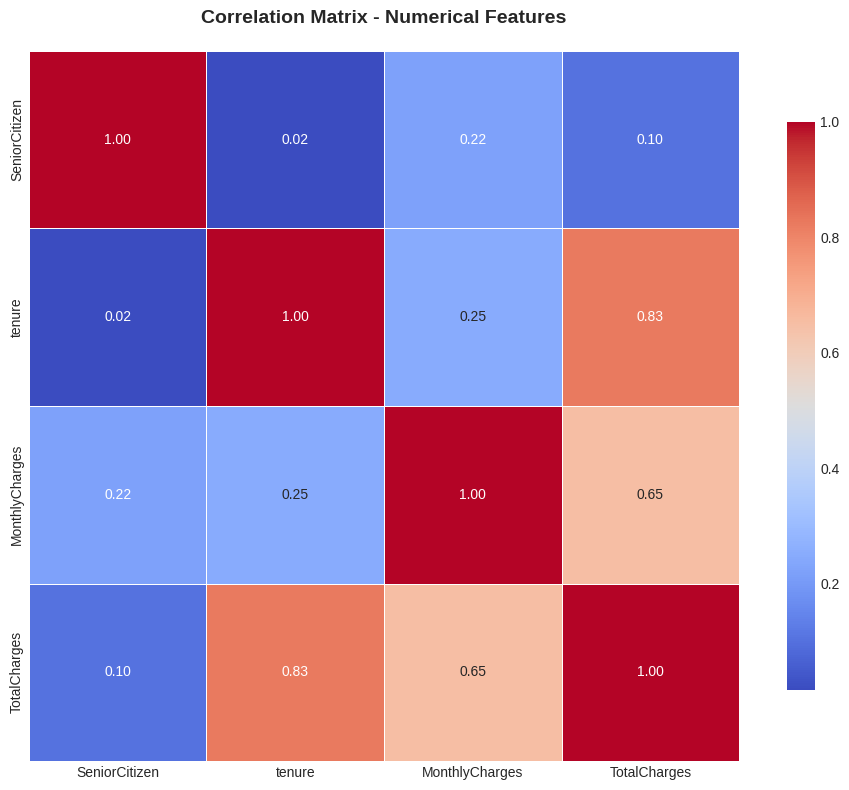

In [ ]:
# Correlation matrix for numerical features
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#**6. Key Insights**

1.**Month-to-month contract customers churn more.**

2.**Customers with higher monthly charges are more likely to leave.**

3.**Longer tenure customers are more loyal.**

4.**Extra services like tech support  reduce churn.**

5.**Some numercial features show weak correlation, meaning churn also depends on service choices.**



# **7. Conclusion**

**This project analyzed telecom customer data using ecploratory data analysis techniques. We identified important patterns related to contact type,tenure,and monthly charges that influence customer churn.**

**The analysis helps the company understand risky customers and improve retention strategies.**

**This project focuses only on analysis and visualization, not prediction modeling.**